# Module 05, 06 & 07 Assignment
## Understanding the ML Problem, Exploratory Data Analysis (EDA) and Basic Preprocessing
**Dataset:** Titanic – Machine Learning from Disaster (Kaggle)

Download the **train.csv** file from Kaggle’s Titanic competition and upload it to this notebook. Rename it to `titanic.csv` or update the file name in the loading cell.
Dataset link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

Total Marks: **100**

### Instructions
- This assignment covers:
  - **Module 05:** Basic ML problem framing (features, target, task type).
  - **Module 06:** Exploratory Data Analysis (EDA).
  - **Module 07:** Basic Preprocessing (handling missing values, encoding, scaling).
- Answer all questions inside this notebook using code and markdown.
- Do not delete the original question texts.
- At the end, the notebook should run from top to bottom without errors.

In [ ]:
# ==============================
# Setup
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("Libraries imported.")

Libraries imported.


---
## Part 0: Understanding the ML Problem (Module 05) – 10 marks

### 0.1 Load the Dataset and Inspect (5 marks)
**Tasks:**
1. Load `titanic.csv` into a pandas DataFrame.
2. Show `.head()`, `.info()`, and `.describe()`.
3. Briefly look at the column names and data types.


In [ ]:
# 0.1 Load the Dataset and Inspect
# TODO: Change file name if needed.

df = pd.read_csv("/content/Titanic-Dataset.csv")#Download the .csv file from Kaggle

print("Shape of dataset:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric columns):")
display(df.describe())

Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe (numeric columns):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 0.2 Identify Features, Target and Task Type (5 marks)
**Tasks:**
Based on the dataset:
1. Identify the **target variable** for a predictive model.
2. List at least **5 potential feature columns** you could use.
3. State whether this is a **classification** or **regression** problem, and explain **why**.

Write your answers below.


#### **Your answers**
- Target variable: Survived
- Feature columns (at least 5):  Pclass, Sex, Age, Fare, SibSp (Parch, Embarked)
- Is this classification or regression, and why?: This is a classification problem because the target feature Survived(0 or 1) representing two classes ( 0 = died or 1 = survived).

---
## Part A: Exploratory Data Analysis (EDA) – 45 marks

### 1. Initial Exploration and Cleaning Decisions (10 marks)
**Tasks:**
1. Show the number of unique values in each column.
2. Identify columns that are clearly **IDs or high-cardinality text** (for example, `PassengerId`, `Name`, `Ticket`).
3. Decide which of these columns you will **drop** for the rest of the analysis and justify in 2–3 sentences.


In [ ]:
# 1. Initial Exploration and Cleaning Decisions (Task 1 is given)
print("Unique values per column:")
for col in df.columns:
    print(col, ":", df[col].nunique())

Unique values per column:
PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


#### Columns to drop and justification
- Columns dropped:PassengerId, Name, Ticket, and Cabin.
- Justification (2–3 sentences): PassengerId (it will not effect mode prediction), Name( It contains long strings and encoding it will create too many useless features), Ticket (same as name), Cabin (it has too many null or missing value maybe more than 70%)

---
### 2. Univariate Analysis (15 marks)
**Tasks:**
- Plot histograms for numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot countplots for categorical features: `Sex`, `Pclass`, `Embarked`.
- Write **two to three insights** about the distributions and any obvious patterns.


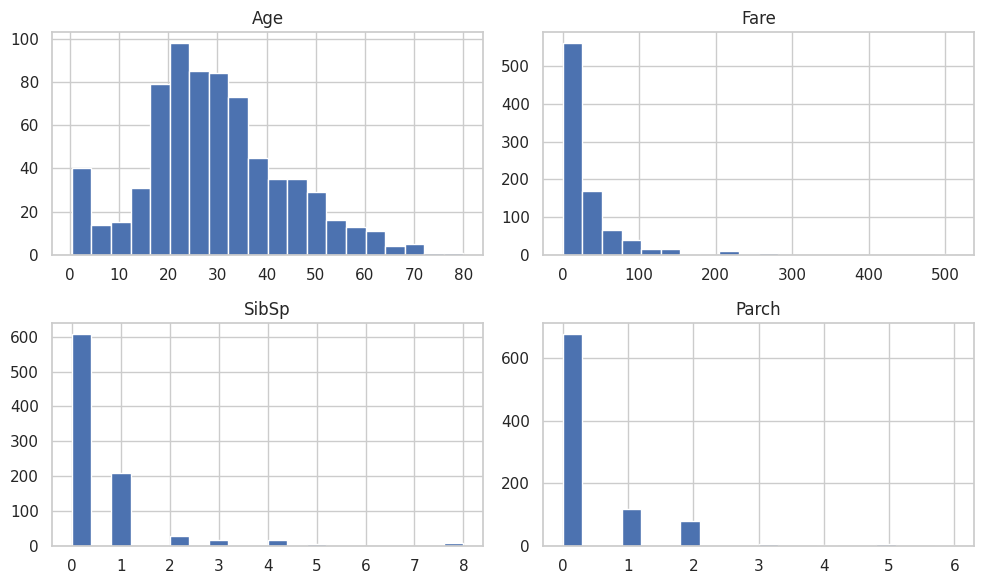

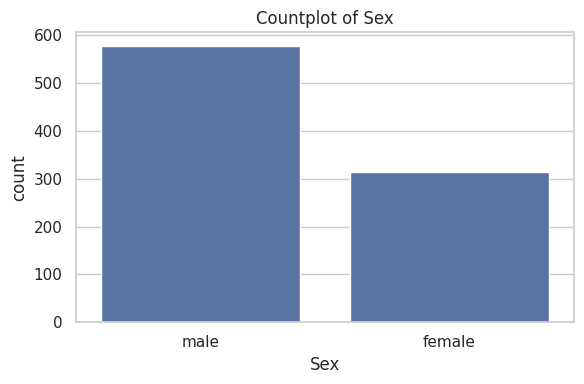

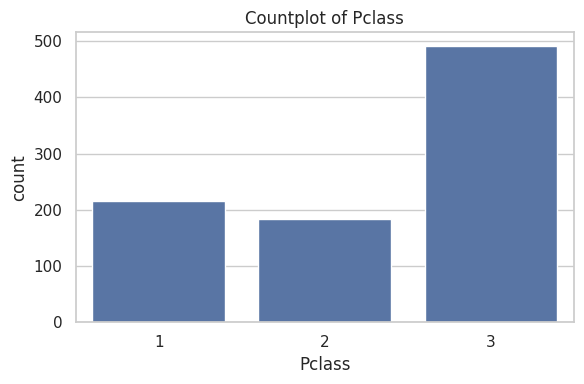

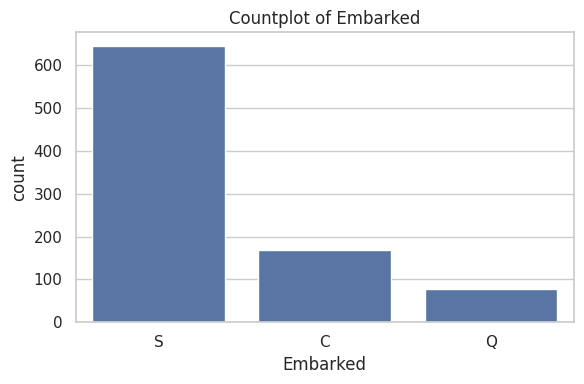

In [ ]:
# 2. Univariate Analysis

numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Histograms code is written for you
df[numeric_cols].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Write Countplots code for key categorical variables [You need to complete]
cat_cols = ["Sex", "Pclass", "Embarked"]
for c in cat_cols:
  plt.figure(figsize=(6, 4))
  sns.countplot(data = df , x = c)
  plt.title(f"Countplot of {c}")
  plt.tight_layout()
  plt.show()

#### Write Your insights
- Insight 1: Age (It is right skewed, thats means most passengers are young, and fewer are elderly. The data is not perfectly centered, maybe some outliers exist)
- Insight 2:  Fare (It is right-skewed most passengers paid low fares while a small number paid very high fares.)
- Insight 3: Sex (The number of male passengers is getter than female passengers). Pclass (Pclass has more passengers in 3rd class).

---
### 3. Bivariate Analysis with Target (15 marks)
Use `Survived` as the target variable.

**Tasks:**
- Compute and plot a **correlation heatmap** for numeric features, including `Survived`.
- Create a **pairplot** for: `Age`, `Fare`, `SibSp`, `Parch`, and `Survived`.
- Write **two to three insights**, including which variables seem associated with survival.


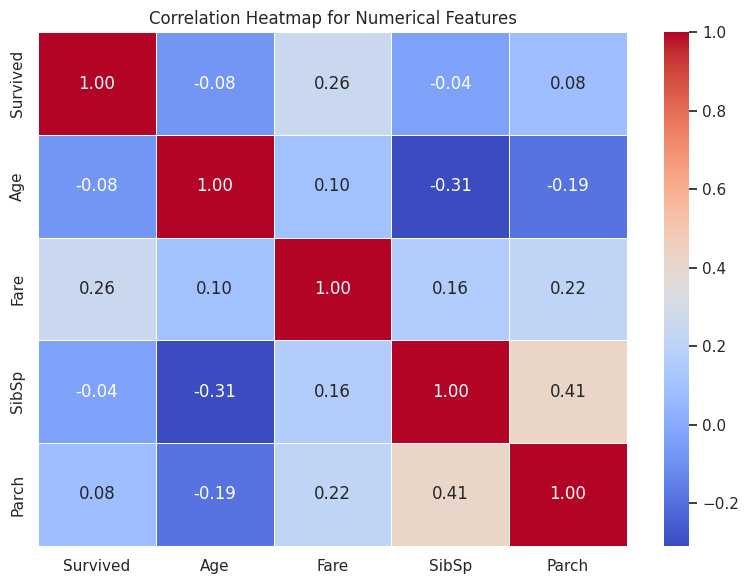

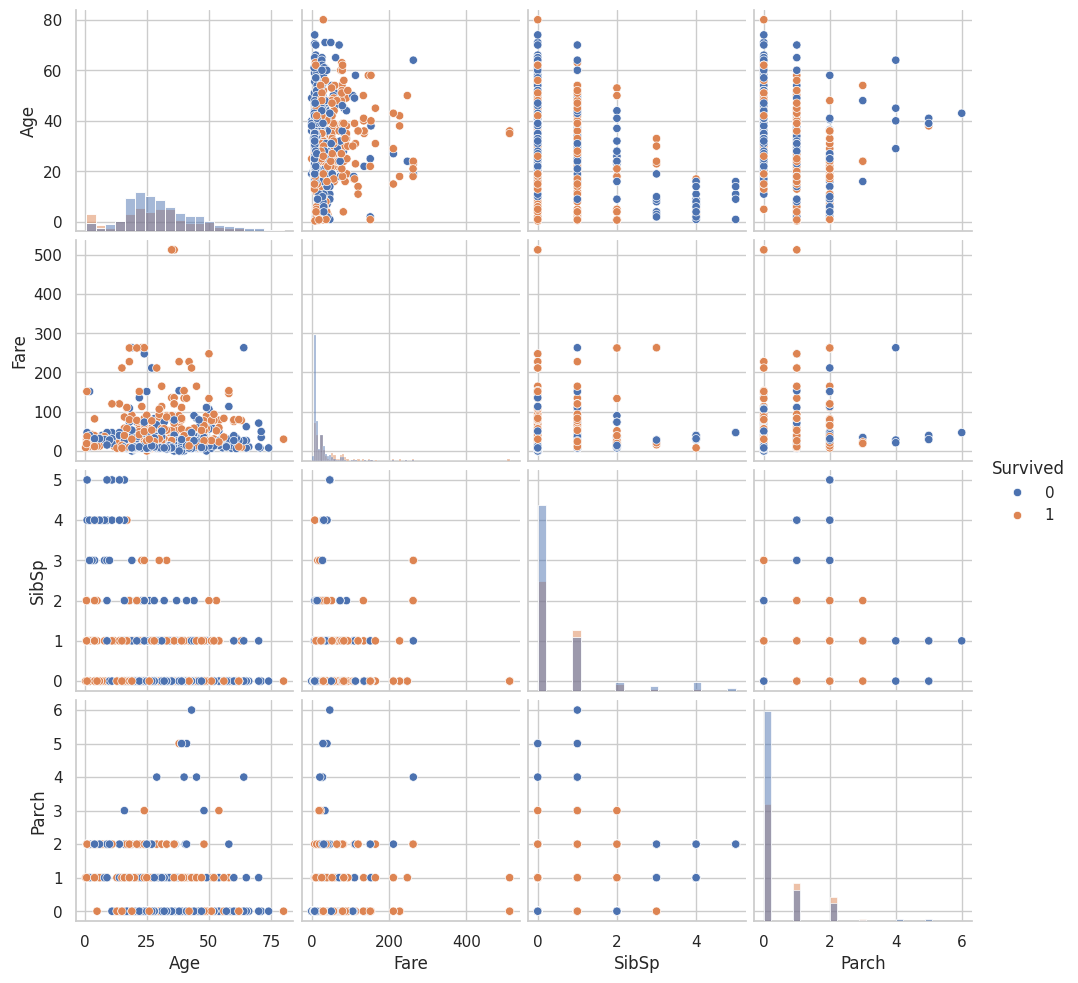

In [ ]:
# 3. Bivariate Analysis with Target

num_for_corr = ["Survived", "Age", "Fare", "SibSp", "Parch"]
## Complete this code block to generate correlation heatmap and pairplot [You need to complete]
corr_m = df[num_for_corr].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_m, annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.tight_layout()
plt.show()
#Create a pairplot
sns.pairplot(df[num_for_corr].dropna(), hue='Survived', vars=["Age","Fare","SibSp","Parch"], diag_kind='hist', height=2.5)
plt.show()

In [ ]:
corr_m['Survived'].sort_values(ascending=False)


,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
SibSp,-0.035322
Age,-0.077221


#### Your insights
- Insight 1: People who paid higher fares were more likely to survive.
We can see this in pairplots, in the small positive correlation between Fare and Survived,
and also in the corr_m output where Fare shows a positive correlation value with Survived.
- Insight 2:  Age shows that younger passengers, especially children, survived a bit more than older people.
But this relationship is weak,the correlation in corr_m is small and close to zero.
- Insight 3: SibSp and Parch show weak correlations with survival thats means they do not strongly affect whether a passenger survived or not.

---
### 4. Categorical vs Target Analysis (5 marks)
**Tasks:**
For each of the following categorical features: `Sex`, `Pclass`, `Embarked`:
- Plot a **bar chart** showing the proportion of passengers who survived in each category.
- Write **two short insights** about which categories have higher or lower survival chances.



Survival proportion by Sex:


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


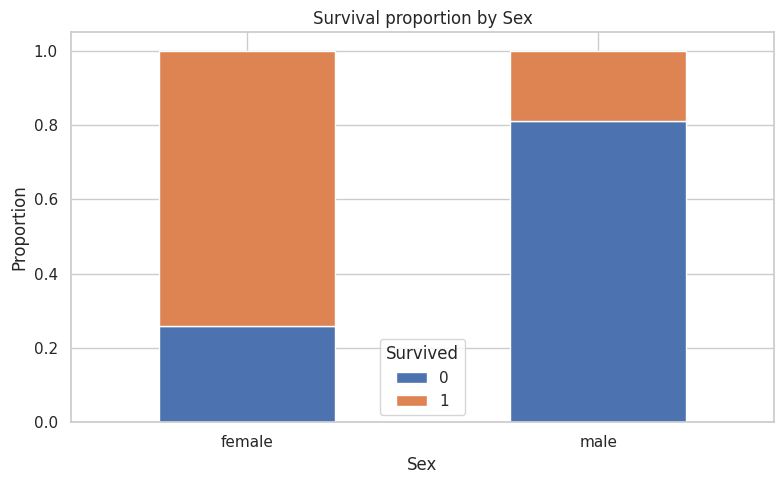


Survival proportion by Pclass:


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


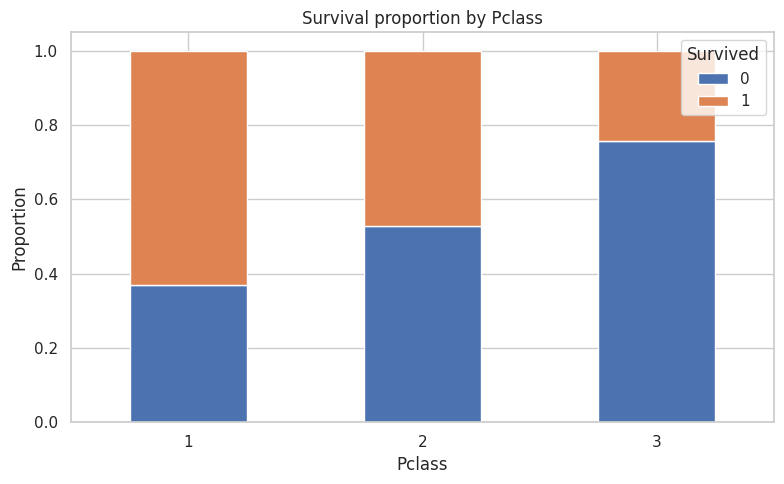


Survival proportion by Embarked:


Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


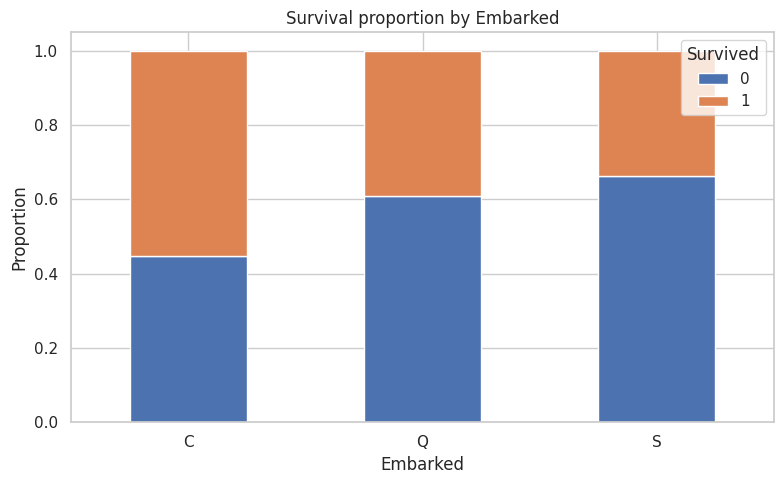

In [ ]:
# 4. Categorical vs Target Analysis [Bar chart code is written for you]

cat_target_cols = ["Sex", "Pclass", "Embarked"]

for c in cat_target_cols:
    ct = pd.crosstab(df[c], df["Survived"], normalize="index")
    print(f"\nSurvival proportion by {c}:")
    display(ct)
    ct.plot(kind="bar", stacked=True)
    plt.title(f"Survival proportion by {c}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

#### Your insights
- Insight 1: Females have a much higher survival proportion compared to males.
- Insight 2:  Passengers in Pclass 1 have higher survival proportions than those in Pclass 2 or 3.

---
## Part B: Basic Data Preprocessing – 45 marks

Focus: **Handling missing values, encoding categorical variables, and scaling numeric features.**

### 5. Handling Missing Values (10 marks)
**Tasks:**
1. Show the count of missing values in each column.
2. Decide how to handle missing values for:
   - `Age` (numeric)
   - `Embarked` (categorical)
   - `Cabin` (many missing values)
3. Implement your chosen strategy in code.
4. Show missing value counts again to confirm.
5. Explain your choices in **3–4 sentences**.


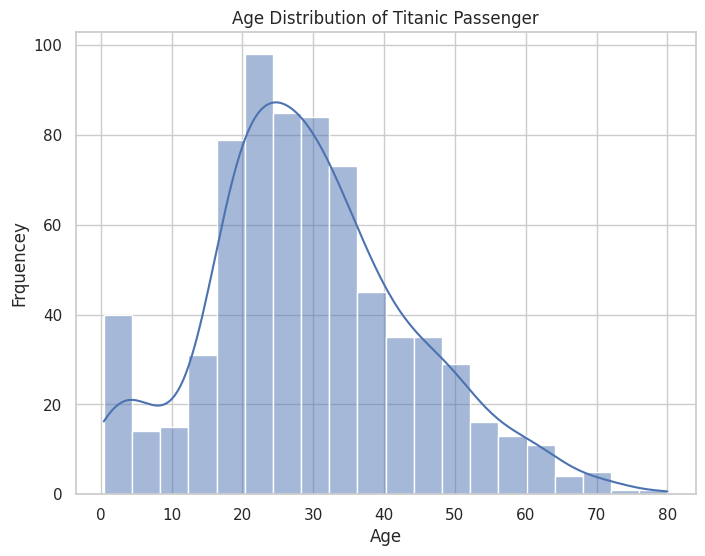

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], kde = True , bins = 20)
plt.title("Age Distribution of Titanic Passenger")
plt.xlabel("Age")
plt.ylabel("Frquencey")
plt.show()

Distribution of Embarked	 Column:


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


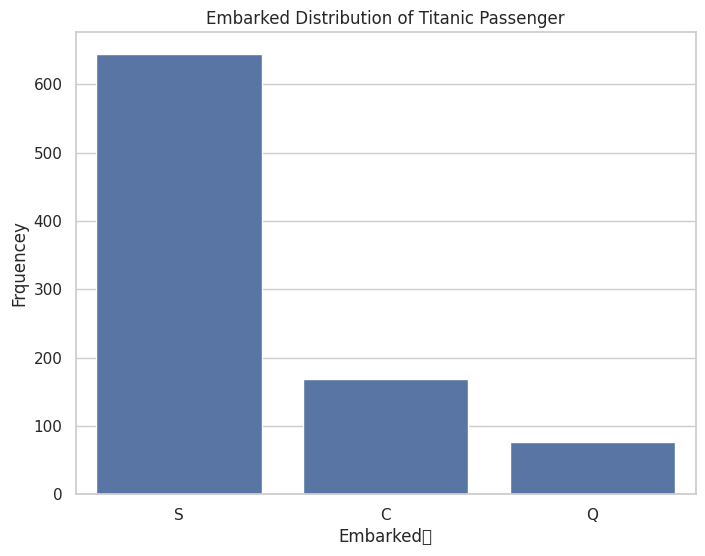

In [ ]:
print("Distribution of Embarked	 Column:")
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = "Embarked")
plt.title("Embarked Distribution of Titanic Passenger")
plt.xlabel("Embarked	")
plt.ylabel("Frquencey")
plt.show()


In [ ]:
# 5. Handling Missing Values

print("Missing values before:") #[Task 1 is done for you]
print(df.isna().sum())

# Drop Cabin (Complete this code block)
df.drop(columns=['Cabin'], inplace=True)

# Fill Age (Complete this code block)
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)

# Fill Embarked (Complete this code block)
Embarked_mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(Embarked_mode)

print("\nMissing values after handling:")
print(df.isna().sum())

Missing values before:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### Explanation of your strategy
- Why you dropped or kept `Cabin`: If a feature has more than 70% null values, it is usually better to remove the feature. 77.1% value are null in cabin feature thats why we drop the feature.
- Why you used median/mean for `Age`:  Since the age distribution is right-skewed, we can use the median as the measure of central tendency.
- Why you used mode or another method for `Embarked`: For categorical values, we can use the mode as the measure of central tendency.

---
### 6. Encoding Categorical Variables (15 marks)
Focus on the following categorical features:
- `Sex`
- `Embarked`
- `Pclass` (treat as categorical)

**Tasks:**
- Use `OneHotEncoder` from sklearn to encode these features.
- Keep `Survived` and the main numeric features (`Age`, `Fare`, `SibSp`, `Parch`).
- Show the shape and head of the encoded DataFrame.


In [ ]:
# 6. Encoding Categorical Variables

df_enc = df.copy()

# Select features for encoding and keep important numeric ones
cat_features = ["Sex", "Embarked", "Pclass"]
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
target_col = "Survived"

# One hot encode categorical variables [You need to do]
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cols = encoder.fit_transform(df_enc[cat_features])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cat_features))

# Build final encoded DataFrame
df_model = pd.concat([
    df_enc[[target_col] + numeric_features],
    encoded_df
], axis=1)

print("Shape after encoding:", df_model.shape)
display(df_model.head())

Shape after encoding: (891, 10)


,Survived,Age,Fare,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,1.0,0.0,1.0,0.0,1.0
1,1,38.0,71.2833,1,0,0.0,0.0,0.0,0.0,0.0
2,1,26.0,7.9250,0,0,0.0,0.0,1.0,0.0,1.0
3,1,35.0,53.1000,1,0,0.0,0.0,1.0,0.0,0.0
4,0,35.0,8.0500,0,0,1.0,0.0,1.0,0.0,1.0


---
### 7. Scaling Numeric Features (15 marks)
**Tasks:**
- Use `StandardScaler` on the numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot boxplots of these features **before** and **after** scaling.
- Write **two sentences** explaining how scaling changes the numeric values and why it is useful before training some ML models.


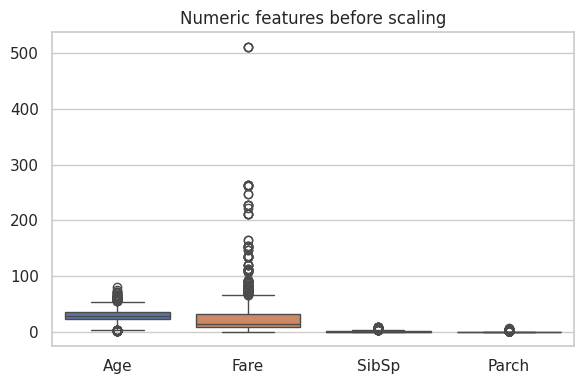

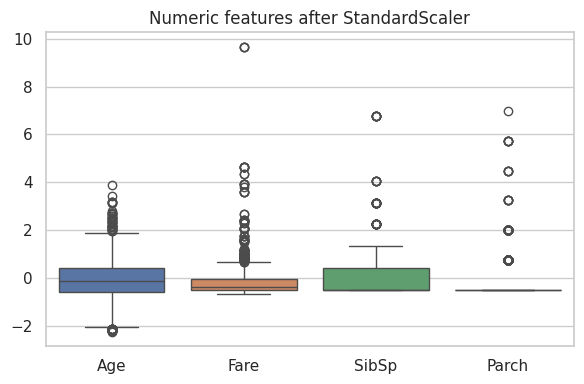


Scaled numeric sample:



,Age,Fare,SibSp,Parch
0,-0.565736,-0.502445,0.432793,-0.473674
1,0.663861,0.786845,0.432793,-0.473674
2,-0.258337,-0.488854,-0.474545,-0.473674
3,0.433312,0.420730,0.432793,-0.473674
4,0.433312,-0.486337,-0.474545,-0.473674


In [ ]:
# 7. Scaling Numeric Features

score_cols = ["Age", "Fare", "SibSp", "Parch"]

# Boxplot before scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_model[score_cols])
plt.title("Numeric features before scaling")
plt.tight_layout()
plt.show()

# Apply StandardScaler [You need to do]
scaler = StandardScaler()
df_scaled = df_model.copy()
df_scaled[score_cols] = scaler.fit_transform(df_model[score_cols])

# Boxplot after scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_scaled[score_cols])
plt.title("Numeric features after StandardScaler")
plt.tight_layout()
plt.show()

print('\nScaled numeric sample:\n')
display(df_scaled[score_cols].head())

#### Your observations on scaling
- Sentence 1: Before scaling the features had very different ranges, but after scaling they all have similar values around 0, so the min max spread becomes balanced.
- Sentence 2:  The feature values are close to each other due to standardization, which helps the model make better predictions.

---
### 8. Simple Feature Quality Check (5 marks)
**Tasks:**
- Show `.info()` of the final processed DataFrame (`df_scaled`).
- Confirm there are no missing values.
- Confirm that all remaining features are numeric and suitable for most ML models.
- Write **one short concluding remark** about dataset readiness.


In [ ]:
# 8. Simple Feature Quality Check
print(df_scaled.info())

print("\nTotal missing values in final DataFrame:", df_scaled.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   SibSp       891 non-null    float64
 4   Parch       891 non-null    float64
 5   Sex_male    891 non-null    float64
 6   Embarked_Q  891 non-null    float64
 7   Embarked_S  891 non-null    float64
 8   Pclass_2    891 non-null    float64
 9   Pclass_3    891 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 69.7 KB
None

Total missing values in final DataFrame: 0


#### Final remark on dataset readiness
- Your remark:  The dataset has been cleaned up by handling missing values in Age and Embarked, removing Cabin, Name, Ticket, and PassengerId, one-hot encoding categorical variables, and scaling the resulting numerical features.  With only numerical characteristics and no missing values, DataFrame is prepared for training simple machine learning models.

---
## Submission
- Run all cells from top to bottom to make sure everything works.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.